In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
dtrain = pd.read_csv('data/train.csv')
dtest = pd.read_csv('data/test.csv')

In [3]:
dtrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Asiding the response variable

In [4]:
response = dtrain.Purchase
dtrain.drop(['Purchase'], inplace=True, axis=1)

## Cleaning the data

### Feature Creation

#### 1. Age

In [5]:
def split_age(age, which):
    if which == 'lower':
        if age[2] != '+':
            return int(age.split('-')[0])
        else:
            return int(age.split('+')[0])
    elif which == 'upper':
        if age[2] != '+':
            return int(age.split('-')[1])
        else:
            return 80 # Because average maximum age is 80

In [6]:
dtrain['lower_age'] = dtrain.Age.apply(lambda row: split_age(row, 'lower'))
dtrain['upper_age'] = dtrain.Age.apply(lambda row: split_age(row, 'upper'))
dtrain['mean_age'] = (dtrain.lower_age + dtrain.upper_age) / 2.0

In [7]:
dtrain.drop(['Age', 'lower_age', 'upper_age'], inplace=True, axis=1)

In [8]:
dtrain.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age
0,1000001,P00069042,F,10,A,2,0,3,NaN,NaN,8.5
1,1000001,P00248942,F,10,A,2,0,1,6.0,14.0,8.5
2,1000001,P00087842,F,10,A,2,0,12,NaN,NaN,8.5
3,1000001,P00085442,F,10,A,2,0,12,14.0,NaN,8.5
4,1000002,P00285442,M,16,C,4+,0,8,NaN,NaN,67.5


#### 2. Stay_In_Current_City_Years

In [9]:
dtrain.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [10]:
dtrain.loc[dtrain.Stay_In_Current_City_Years == '4+', 'Stay_In_Current_City_Years'] = '4'
dtrain['Stay_In_Current_City_Years'] = dtrain.Stay_In_Current_City_Years.astype(int)

## Filling the NAs

In [11]:
dtrain.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age
0,1000001,P00069042,F,10,A,2,0,3,NaN,NaN,8.5
1,1000001,P00248942,F,10,A,2,0,1,6.0,14.0,8.5
2,1000001,P00087842,F,10,A,2,0,12,NaN,NaN,8.5
3,1000001,P00085442,F,10,A,2,0,12,14.0,NaN,8.5
4,1000002,P00285442,M,16,C,4,0,8,NaN,NaN,67.5


In [12]:
dtrain.fillna(-999, inplace=True)

In [13]:
dtrain.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age
0,1000001,P00069042,F,10,A,2,0,3,-999.0,-999.0,8.5
1,1000001,P00248942,F,10,A,2,0,1,6.0,14.0,8.5
2,1000001,P00087842,F,10,A,2,0,12,-999.0,-999.0,8.5
3,1000001,P00085442,F,10,A,2,0,12,14.0,-999.0,8.5
4,1000002,P00285442,M,16,C,4,0,8,-999.0,-999.0,67.5


In [14]:
dtrain.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
mean_age                      float64
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
dtrain['City_Category'] = le.fit_transform(dtrain.City_Category)
dtrain['Gender'] = le.fit_transform(dtrain.Gender)
dtrain['User_ID'] = le.fit_transform(dtrain.User_ID)
dtrain['Product_ID'] = le.fit_transform(dtrain.Product_ID)

In [19]:
dtrain['Purchase'] = response
dtrain.to_csv('data/cleaned_train.csv')
dtrain.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age,Purchase
0,0,672,0,10,0,2,0,3,-999.0,-999.0,8.5,8370
1,0,2376,0,10,0,2,0,1,6.0,14.0,8.5,15200
2,0,852,0,10,0,2,0,12,-999.0,-999.0,8.5,1422
3,0,828,0,10,0,2,0,12,14.0,-999.0,8.5,1057
4,1,2734,1,16,2,4,0,8,-999.0,-999.0,67.5,7969


## Variable Importance

In [32]:
import xgboost as xgb
from pprint import pprint
import operator

In [40]:
def xgb_feature_importance(features, labels, num_rounds, fnames="*"):
    if fnames == "*":
        pass
    else:
        # // TODO Implement feature selection later
        pass
    
    param = {}
    param['objective'] = 'reg:linear'
    param['eta'] = 0.01
    param['max_depth'] = 8
    param['seed'] = 42
    param['nthread'] = -1
    param['eval_metric'] = "rmse"
    param['silent'] = 1
    dtrain = xgb.DMatrix(features, label=labels)
    watchlist = [(dtrain, 'train')]
    gbdt = xgb.train(param, dtrain, num_rounds, watchlist)
    importance = gbdt.get_fscore()
    importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
    df = pd.DataFrame(importance, columns=['feature', 'fscore'])
    df['fscore'] = df['fscore'] / df['fscore'].sum()
    plt.figure()
    df.plot()
    df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
    plt.title('XGBoost Feature Importance')
    plt.xlabel('relative importance')
    plt.show()

[0]	train-rmse:10440.1
[1]	train-rmse:10343.6
[2]	train-rmse:10248.2
[3]	train-rmse:10153.7
[4]	train-rmse:10060.3
[5]	train-rmse:9967.92
[6]	train-rmse:9876.54
[7]	train-rmse:9786.16
[8]	train-rmse:9696.72
[9]	train-rmse:9608.28
[10]	train-rmse:9520.81
[11]	train-rmse:9434.28
[12]	train-rmse:9348.71
[13]	train-rmse:9264.07
[14]	train-rmse:9180.37
[15]	train-rmse:9097.54
[16]	train-rmse:9015.65
[17]	train-rmse:8934.65
[18]	train-rmse:8854.54
[19]	train-rmse:8775.34
[20]	train-rmse:8696.89
[21]	train-rmse:8619.36
[22]	train-rmse:8542.69
[23]	train-rmse:8466.83
[24]	train-rmse:8391.88
[25]	train-rmse:8317.7
[26]	train-rmse:8244.37
[27]	train-rmse:8171.87
[28]	train-rmse:8100.19
[29]	train-rmse:8029.29
[30]	train-rmse:7959.21
[31]	train-rmse:7889.89
[32]	train-rmse:7821.37
[33]	train-rmse:7753.64
[34]	train-rmse:7686.68
[35]	train-rmse:7620.45
[36]	train-rmse:7554.97
[37]	train-rmse:7490.23
[38]	train-rmse:7426.25
[39]	train-rmse:7363
[40]	train-rmse:7300.46
[41]	train-rmse:7238.62
[42]	t

[334]	train-rmse:2764.8
[335]	train-rmse:2764.09
[336]	train-rmse:2763.27
[337]	train-rmse:2762.55
[338]	train-rmse:2761.72
[339]	train-rmse:2760.86
[340]	train-rmse:2760.17
[341]	train-rmse:2759.39
[342]	train-rmse:2758.52
[343]	train-rmse:2757.83
[344]	train-rmse:2757.06
[345]	train-rmse:2756.44
[346]	train-rmse:2755.81
[347]	train-rmse:2755.02
[348]	train-rmse:2754.25
[349]	train-rmse:2753.64
[350]	train-rmse:2752.97
[351]	train-rmse:2752.33
[352]	train-rmse:2751.57
[353]	train-rmse:2750.99
[354]	train-rmse:2750.27
[355]	train-rmse:2749.53
[356]	train-rmse:2748.98
[357]	train-rmse:2748.41
[358]	train-rmse:2747.74
[359]	train-rmse:2747.05
[360]	train-rmse:2746.53
[361]	train-rmse:2745.79
[362]	train-rmse:2745.24
[363]	train-rmse:2744.71
[364]	train-rmse:2744.04
[365]	train-rmse:2743.39
[366]	train-rmse:2742.88
[367]	train-rmse:2742.21
[368]	train-rmse:2741.68
[369]	train-rmse:2741.18
[370]	train-rmse:2740.66
[371]	train-rmse:2740.16
[372]	train-rmse:2739.64
[373]	train-rmse:2738.93
[

[664]	train-rmse:2649.31
[665]	train-rmse:2649.21
[666]	train-rmse:2649.08
[667]	train-rmse:2648.81
[668]	train-rmse:2648.67
[669]	train-rmse:2648.43
[670]	train-rmse:2648.36
[671]	train-rmse:2648.09
[672]	train-rmse:2647.98
[673]	train-rmse:2647.82
[674]	train-rmse:2647.68
[675]	train-rmse:2647.55
[676]	train-rmse:2647.43
[677]	train-rmse:2647.31
[678]	train-rmse:2647.05
[679]	train-rmse:2646.88
[680]	train-rmse:2646.63
[681]	train-rmse:2646.53
[682]	train-rmse:2646.35
[683]	train-rmse:2646.21
[684]	train-rmse:2645.98
[685]	train-rmse:2645.77
[686]	train-rmse:2645.65
[687]	train-rmse:2645.56
[688]	train-rmse:2645.39
[689]	train-rmse:2645.26
[690]	train-rmse:2645.01
[691]	train-rmse:2644.79
[692]	train-rmse:2644.72
[693]	train-rmse:2644.52
[694]	train-rmse:2644.41
[695]	train-rmse:2644.17
[696]	train-rmse:2644.08
[697]	train-rmse:2643.85
[698]	train-rmse:2643.63
[699]	train-rmse:2643.5
[700]	train-rmse:2643.37
[701]	train-rmse:2643.22
[702]	train-rmse:2643.15
[703]	train-rmse:2642.93
[

[994]	train-rmse:2601.28
[995]	train-rmse:2601.12
[996]	train-rmse:2601.02
[997]	train-rmse:2600.82
[998]	train-rmse:2600.67
[999]	train-rmse:2600.57


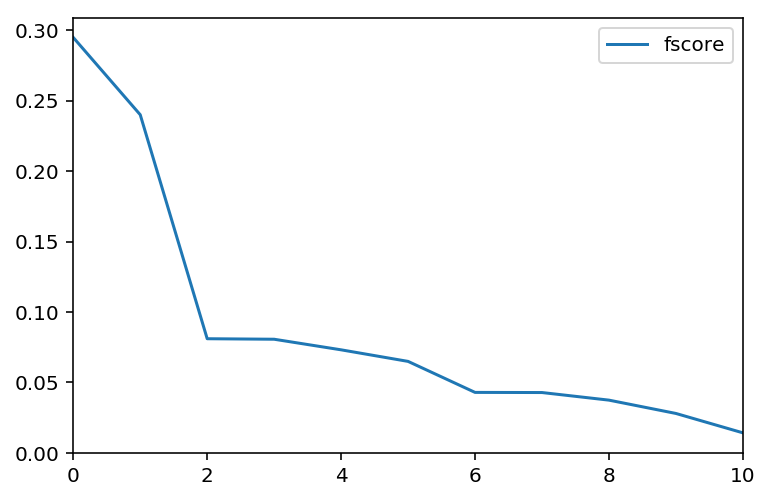

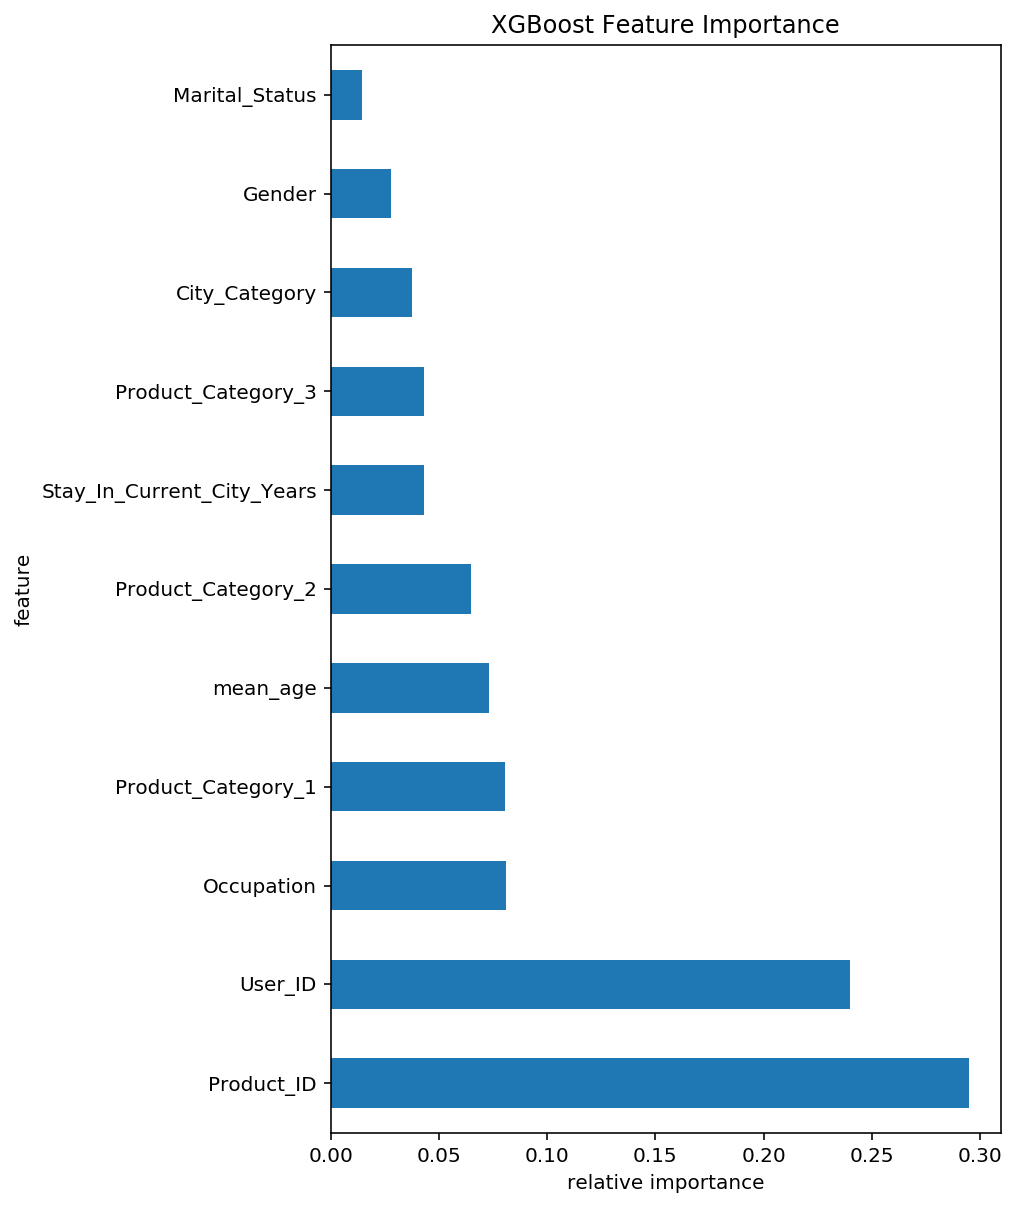

In [41]:
dtrain = pd.read_csv('data/cleaned_train.csv').iloc[:, 1:]
features = dtrain.iloc[:, 0:-1]
labels = dtrain.Purchase
xgb_feature_importance(features, labels, 1000)